In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setting plot style
sns.set_style("whitegrid")

In [122]:
import pandas as pd

df = pd.read_csv("/content/heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [123]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [124]:
if 'num' in df.columns:
    # Convert 1-4 to 1 (Disease), 0 is 0 (Healthy)
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df = df.drop(columns=['num']) # Remove original 'num' column
    print("Target variable created successfully.")
else:
    print("'num' column already processed or missing.")

print("\nTarget Distribution:")
print(df['target'].value_counts())

Target variable created successfully.

Target Distribution:
target
1    509
0    411
Name: count, dtype: int64


In [125]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [126]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# Check if these columns exist in dataframe (Safety Step)
numeric_cols = [col for col in numeric_cols if col in df.columns]
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Imputing Numerical Data with Median
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Imputing Categorical Data with Mode (Most Frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("\n--- Missing Values Checked ---")
print(df.isnull().sum().sum())


--- Missing Values Checked ---
1097


In [127]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

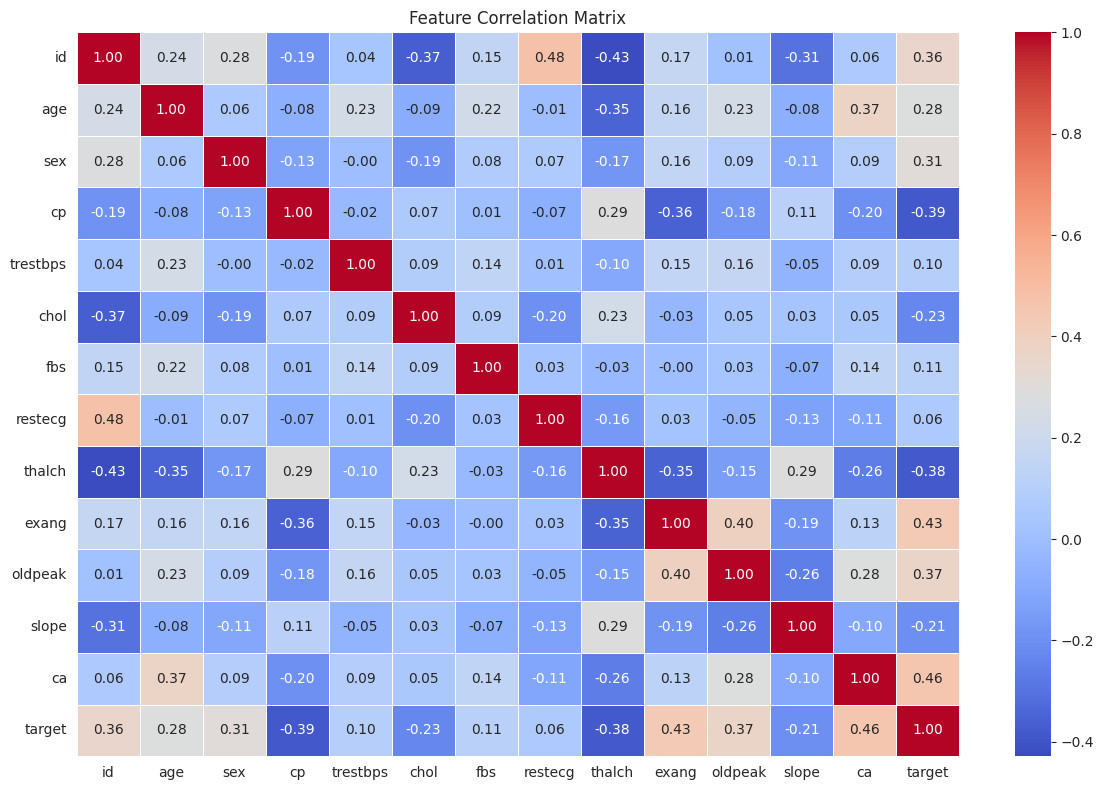

In [135]:
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


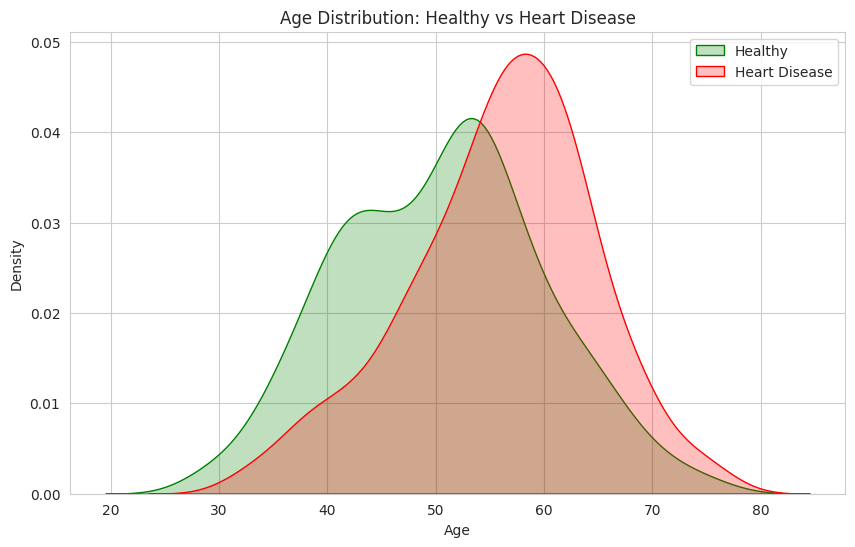

In [136]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df[df['target'] == 0]['age'],
    fill=True,
    color='green',
    label='Healthy'
)

sns.kdeplot(
    data=df[df['target'] == 1]['age'],
    fill=True,
    color='red',
    label='Heart Disease'
)

plt.title('Age Distribution: Healthy vs Heart Disease')
plt.xlabel('Age')
plt.legend()
plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)   # update if target name differs
y = df['target']

# Keep only numeric columns
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


In [141]:
model_scores = {}

In [142]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
model_scores['Logistic Regression'] = accuracy_score(y_test, lr_pred)

print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, lr_pred))


--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        75
           1       0.87      0.78      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [143]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
model_scores['Decision Tree'] = accuracy_score(y_test, dt_pred)
print("\n--- Decision Tree Results ---")
print(classification_report(y_test, dt_pred))


--- Decision Tree Results ---
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        75
           1       0.84      0.86      0.85       109

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



In [144]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
model_scores['Random Forest'] = accuracy_score(y_test, rf_pred)
print("\n--- Random Forest Results ---")
print(classification_report(y_test, rf_pred))


--- Random Forest Results ---
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        75
           1       0.87      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # use softmax for multi-class

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

lstm_model.fit(
    X_train_lstm, y_train,
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6576 - loss: 0.6732
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6696 - loss: 0.6177
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6551 - loss: 0.6088
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6866 - loss: 0.5657
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7666 - loss: 0.5000
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9149 - loss: 0.4394
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9877 - loss: 0.3525
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9826 - loss: 0.2766
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9859 - loss: 0.2278
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9893 - loss: 0.1838
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9991 - loss: 0.1533
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9953 - lo

In [146]:
lstm_pred_prob = lstm_model.predict(X_test_lstm)
lstm_pred = (lstm_pred_prob > 0.5).astype(int)

model_scores['LSTM'] = accuracy_score(y_test, lstm_pred)

print("\n--- LSTM Results ---")
print(classification_report(y_test, lstm_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

--- LSTM Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       109

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



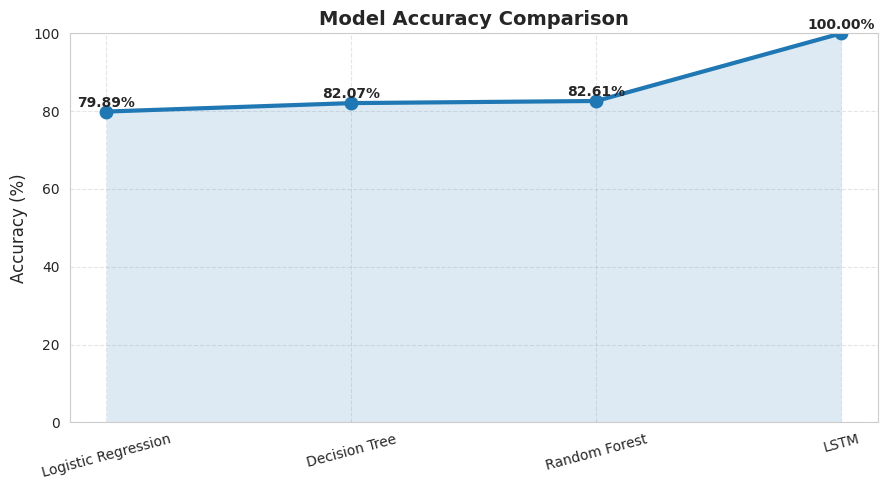


✅ Best Model: LSTM (100.00%)


In [147]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 5))

models_list = list(model_scores.keys())
acc_list = [score * 100 for score in model_scores.values()]
x = np.arange(len(models_list))

# Line plot with style
plt.plot(
    x, acc_list,
    linestyle='-',
    linewidth=3,
    marker='o',
    markersize=9
)

# Fill under the curve (soft visual effect)
plt.fill_between(x, acc_list, alpha=0.15)

plt.xticks(x, models_list, rotation=15)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 100)

# Grid styling
plt.grid(True, linestyle='--', alpha=0.5)

# Value labels
for i, v in enumerate(acc_list):
    plt.text(i, v + 1.2, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

best_model = max(model_scores, key=model_scores.get)
print(f"\n✅ Best Model: {best_model} ({model_scores[best_model]*100:.2f}%)")
